7. Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,
1=yes). Admitted is the target variable.
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [64]:
df = pd.read_csv("../datasets/Dataset_Admission_Predict - Dataset_Admission_Predict.csv")

In [65]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [67]:
df.shape

(400, 9)

In [68]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [69]:
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**creating graphs for checking realation**

[]

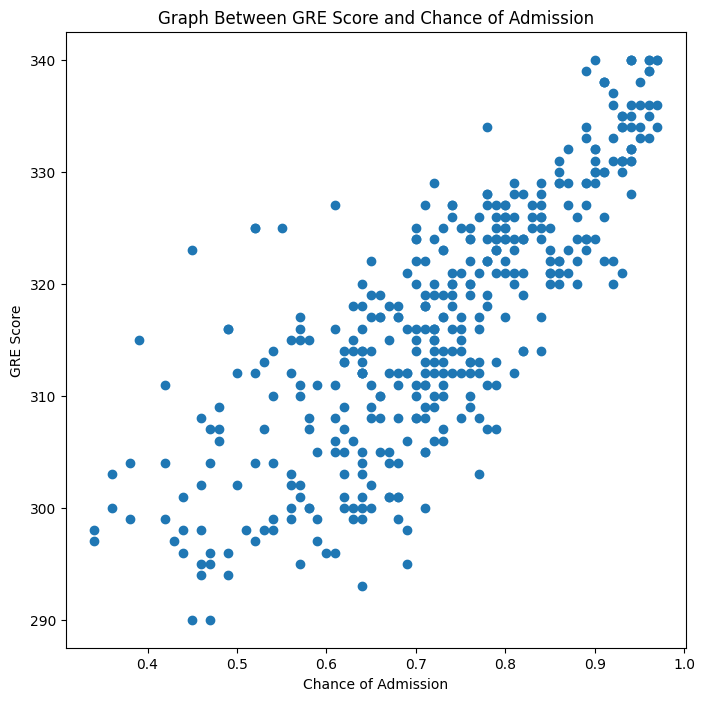

In [70]:
# graph between GRE score and chance



plt.figure(figsize=(8, 8))
plt.title("Graph Between GRE Score and Chance of Admission")
plt.scatter(x=df["Chance of Admit"], y=df["GRE Score"])
plt.xlabel("Chance of Admission")
plt.ylabel("GRE Score")
plt.plot()



[]

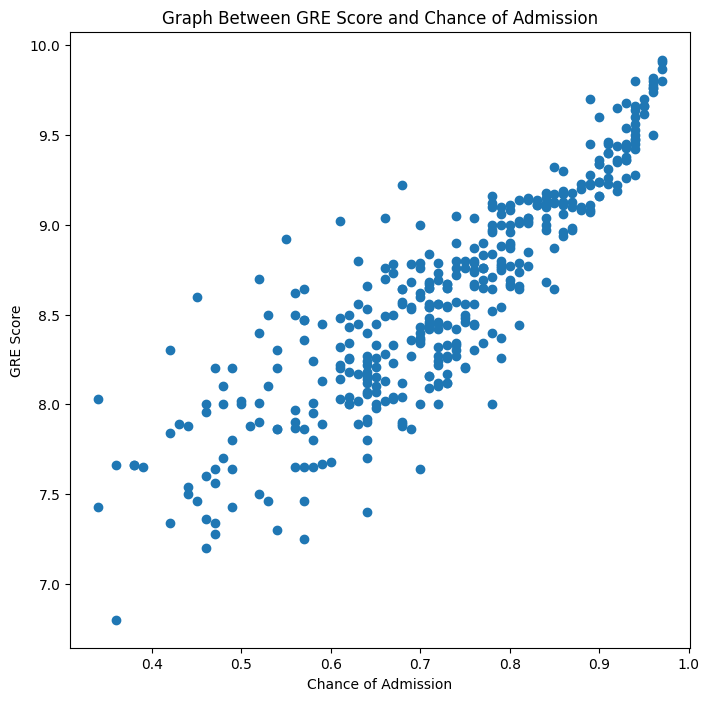

In [71]:
plt.figure(figsize=(8, 8))
plt.title("Graph Between GRE Score and Chance of Admission")
plt.scatter(x=df["Chance of Admit"], y=df["CGPA"])
plt.xlabel("Chance of Admission")
plt.ylabel("GRE Score")
plt.plot()

Data Preprocessing

In [72]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_scaled["Admit"] = (df_scaled["Chance of Admit"] >= 0.75).astype(int)

Train - test split 

In [ ]:
from sklearn.model_selection import train_test_split

x = df_scaled[['GRE Score', 'CGPA']] 
y = df_scaled["Admit"]  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = np.array(y_test)

model training

In [74]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [75]:
y_pred = model.predict(x_test)

Evaluate model


In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))  
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


Model Evaluation:
R² Score: 0.690522243713733
Mean Absolute Error (MAE): 0.075
Mean Squared Error (MSE): 0.075


In [77]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,y_pred)

0.925

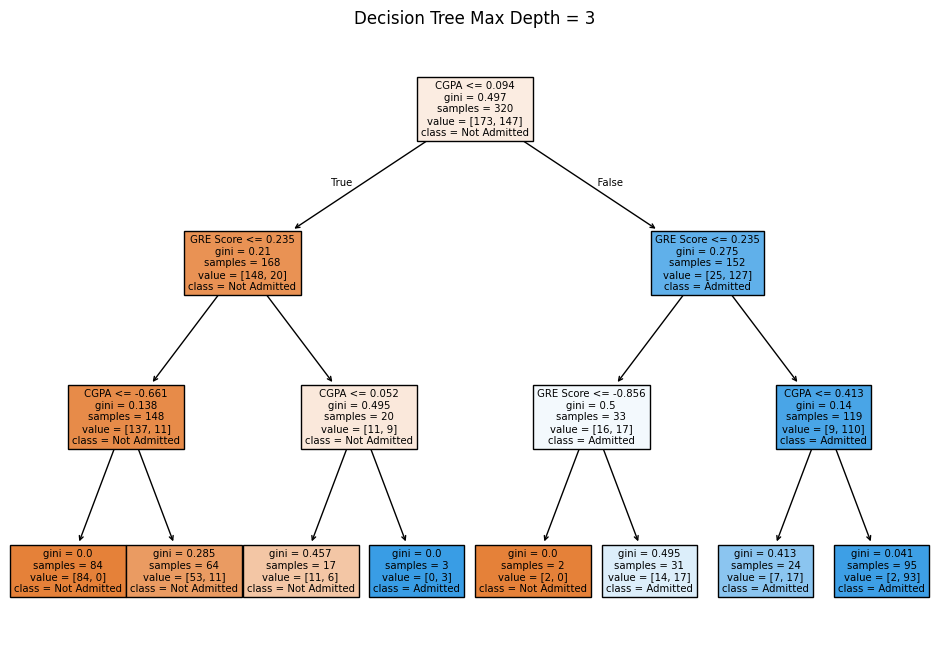

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()